In [1]:
import os

import protease_activity_analysis as paa

# test the data loading function
test_dir = paa.tests.get_data_dir()
data_path = os.path.join(test_dir, "2019_11.21_BatchBV.01 RESULTS.xlsx")
id_path = os.path.join(test_dir, "BV.01_IDtoSampleType.xlsx")

sheets = ['Rev3-CONH2-1', 'Rev3-CONH2-2']
stock_name = "Stock"

syneos_data = paa.data.load_syneos(data_path, id_path, sheets, stock_name)

# 14-plex
plex = ["1UR3_01", "2UR3_02", "3UR3_03", "4UR3_04", "5UR3_05", "6UR3_06", 
           "7UR3_07", "8UR3_08", "9UR3_10", "1UR3_11", "2UR3_13", "3UR3_15", 
           "4UR3_16", "5UR3_18"]

# 20-plex
# plex= ["1UR3_01", "2UR3_02", "3UR3_03", "4UR3_04", "5UR3_05", "6UR3_06", 
#            "7UR3_07","8UR3_08", "9UR3_10", "1UR3_11", "2UR3_13", "3UR3_15", 
#            "4UR3_16", "5UR3_18", "6UR3_20", "1UR3_09", "2UR3_12", "3UR3_14", 
#            "4UR3_17", "5UR3_19"]

syneos_data = syneos_data.drop(stock_name, level='Sample ID')

In [2]:
normalized_matrix = paa.data.process_syneos_data(syneos_data, plex)

normalized_matrix.index = syneos_data.index
normalized_matrix.columns = plex

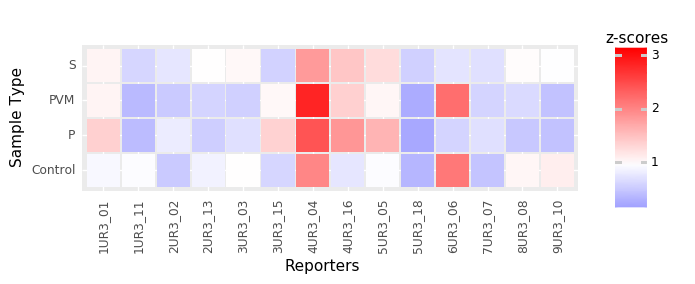

In [3]:
""" to make a heatmap """
update = paa.vis.plot_heatmap(normalized_matrix, plex)

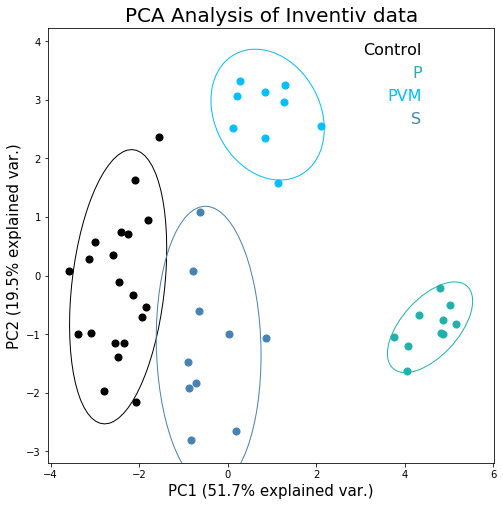

In [4]:
""" to perform PCA """
undo_multiindex = normalized_matrix.reset_index()

#if you want to filter for only some Sample Types, change code below
#undo_multiindex = undo_multiindex [~undo_multiindex['Sample Type'].str.contains("LAM")]
  
pca = paa.vis.plot_pca(undo_multiindex, plex)
